In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [2]:
# Membaca dataset
data = pd.read_csv('Data_Mahasiswa.csv', delimiter=';')

In [3]:
print(data.head())

  Email Address         Nama Lengkap Mahasiswa      NIM   \
0           NaN                            NaN       NaN   
1           NaN  Samuel Saut Royzeki Aritonang  11422026   
2           NaN            Calvin Josep Silaen  11422038   
3           NaN                Indah Silitonga  11422060   
4           NaN             Asri Yohana Sirait  11422029   

                             Program Studi Mahasiswa Angkatan Mahasiswa  \
0                                                NaN                NaN   
1  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
2  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
3  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
4  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   

  Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?    \
0                                                NaN                       
1                                   

In [4]:
# Mengisi nilai yang hilang
data = data.fillna("Unknown")

# Label Encoding untuk kolom kategorikal
label_encoders = {}
for column in data.columns:
    if data[column].dtype == "object":
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Memilih fitur numerik saja
data_numeric = data.select_dtypes(include=['number'])

# Menstandarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numeric)

# Menampilkan hasil
print(X_scaled)

[[-1.65030553  1.33049328  1.72601487 ...  3.92052574  2.13018153
  -1.07658956]
 [-1.65030553  1.0154575  -1.22807631 ... -1.3871019   0.35483572
   0.99269357]
 [-1.65030553 -1.33361365 -1.14582783 ... -0.72364844  0.35483572
  -1.15322967]
 ...
 [ 1.21720815  1.10448935 -1.48852982 ...  0.60325847 -1.42051009
  -1.07658956]
 [ 1.23089557  0.98806309 -1.52280002 ...  1.93016538  0.94661765
   1.45253427]
 [ 0.62864926  0.46072058 -1.39257327 ...  0.60325847 -1.42051009
   0.1496523 ]]


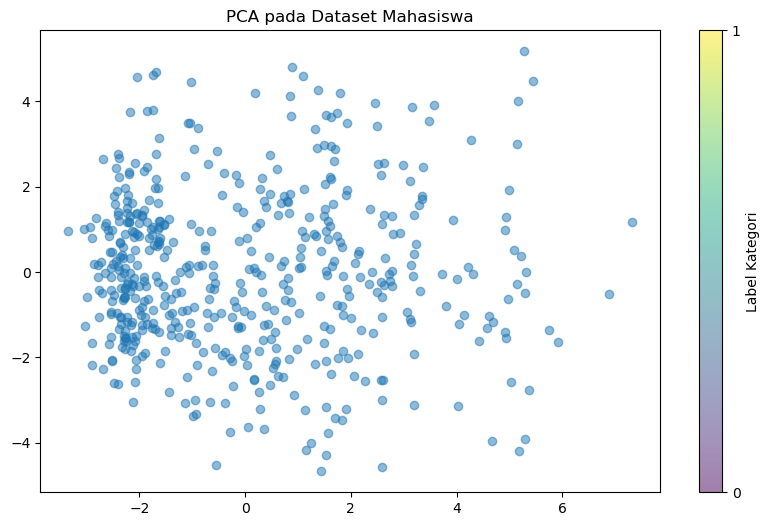

In [20]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Mengurangi menjadi 2 komponen utama
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA pada Dataset Mahasiswa")
plt.colorbar(ticks=range(10), label='Label Kategori')
plt.show()

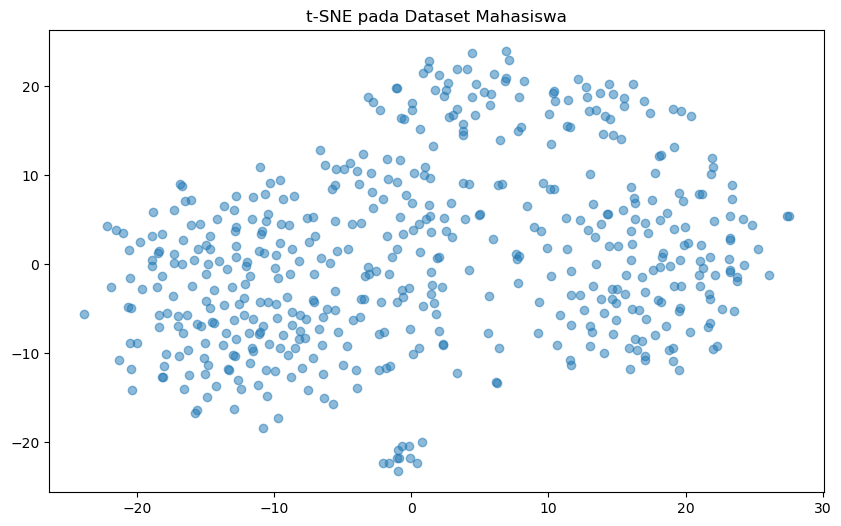

In [6]:
# Reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisasi hasil t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("t-SNE pada Dataset Mahasiswa")
plt.show()

D:\MATA KULIAH\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


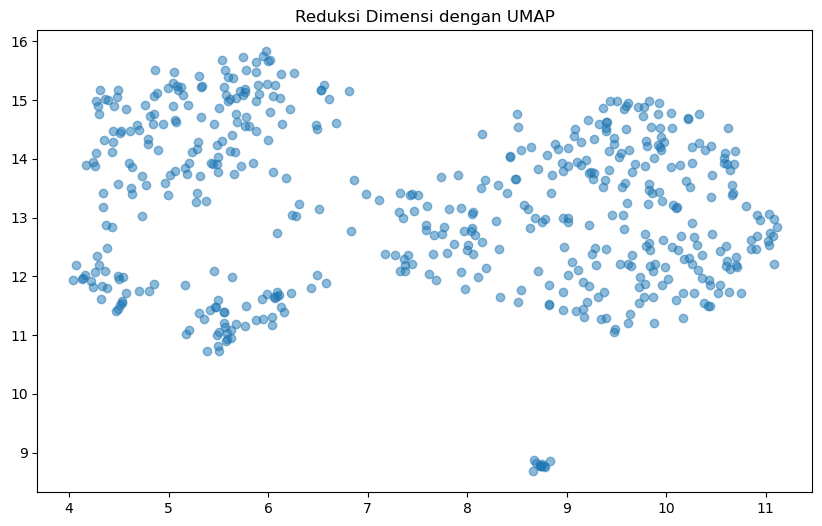

In [7]:
# Reduksi dimensi menggunakan UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Visualisasi hasil UMAP
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title("Reduksi Dimensi dengan UMAP")
plt.show()